In [2]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator,load_img
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# Adding Old Train_set and Test_set


In [4]:
import cv2
import os
import pandas as pd   
from PIL import Image,ImageOps
from numpy import asarray  
import numpy as np
  
#src='/home/rabikkk/Desktop/final_project/data2/train/'
#src1='/home/rabikkk/Desktop/final_project/data_new/train/'
src='/home/rabikkk/Desktop/final_project/last_dataset/TRAIN/'
filenames_train=os.listdir(src)

categories_train=[]
image_train=[]
print(len(filenames_train))
for f_name in filenames_train:
    image=Image.open(src+f_name).convert('RGB')
    image=ImageOps.grayscale(image)
    #image=cv2.imread(src+f_name)
    #image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    numpydata = asarray(image)
    image_train.append(numpydata)
    #print(len(image_train))
    category=f_name.split('_')[0]
    if category=='close':
      categories_train.append(0)
    elif category=='index': 
      categories_train.append(1)
    elif category=='last': 
      categories_train.append(2)
    else:
      categories_train.append(3)

df=pd.DataFrame({
    'filename':filenames_train,
    'category':categories_train
})

image_train=np.asarray(image_train)
image_train = image_train.reshape((image_train.shape[0],32, 32,1))
image_train = image_train.astype("float32") / 255.0
categories_train=np.asarray(categories_train)
categories_train=categories_train.reshape(len(filenames_train),1)

print(image_train.shape)
print(categories_train.shape)


#print(categories_train)


35033
(35033, 32, 32, 1)
(35033, 1)


Adding Test_set

In [5]:
import cv2
import os
import pandas as pd   
from numpy import asarray  
import numpy as np
# Importing Image and ImageOps module from PIL package
from PIL import Image, ImageOps

#src='/home/rabikkk/Desktop/final_project/data2/test/'
#src1='/home/rabikkk/Desktop/final_project/data_new/test/'
src='/home/rabikkk/Desktop/final_project/last_dataset/test/'
filenames_test=os.listdir(src)

categories_test=[]
image_test=[]
print(len(filenames_test))
for f_name in filenames_test:
    image=Image.open(src+f_name).convert('RGB')
    image=ImageOps.grayscale(image)
     #image=cv2.imread(src+f_name)
   #image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    numpydata = asarray(image)
    image_test.append(numpydata)
   # print(len(image_test))
    category=f_name.split('_')[0]
    if category=='close':
      categories_test.append(0)
    elif category=='index': 
      categories_test.append(1)
    elif category=='last': 
      categories_test.append(2)
    else:
      categories_test.append(3)


df=pd.DataFrame({
    'filename':filenames_test,
    'category':categories_test
})
image_test=np.asarray(image_test)
image_test = image_test.reshape((image_test.shape[0], 32, 32,1))
image_test = image_test.astype("float32") / 255.0
#image_test =image_test.reshape(len(image_test),(32,32))
#image_test= np.ndarray(shape=(2050, 32, 32, 1))
#image_test=image_test/255.0
#image_test=image_test.reshape(2008,32,32)
categories_test=np.asarray(categories_test)
categories_test=categories_test.reshape(len(filenames_test),1)

print(image_test.shape)
print(categories_test.shape)

8800
(8800, 32, 32, 1)
(8800, 1)


# MODEL1

In [6]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout,LeakyReLU
from tensorflow.keras.utils import plot_model
#Instantieate an empty model
model = Sequential(name="Static_Gesture_Model")

#C1 Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32, 32,1)))
#S2 Pooling Layer
model.add(MaxPooling2D(strides=2))
#C3 Convolutional Layer
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
#S4 Pooling Layer
model.add(MaxPooling2D(strides=2))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())
#Fully Connected Layer
model.add(Dense(256, activation='tanh'))
#model.add(LeakyReLU(alpha=0.1))
#Fully Connected Layer
model.add(Dense(84, activation='tanh'))
#Fully Connected Layer
model.add(Dense(10, activation='tanh'))

#model.add(Dropout(0.50))
#Output Layer with Softmax Activation
model.add(Dense(4, activation='softmax'))
model.summary()

#plot_model(model, "ff.png", show_layer_names=Galse, show_shapes=True)
#plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', expand_nested=True)

Model: "Static_Gesture_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________________________________
dense_1 (Dense)              (None, 84)       

# Learning

In [ ]:
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import tensorflow as tf
print("The length of list is: ", len(image_train))
print("The length of list is: ", len(image_test))

# early stopping
early_stop = EarlyStopping(patience=50, monitor='val_loss')
opt = keras.optimizers.Adam(learning_rate=0.000025)
model.compile(optimizer=opt, #'adam'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#history = model.fit(image_train, categories_train, epochs=10)

model_name = "deneme"
filepath='/home/rabikkk/Desktop/final_project/learning/' + model_name + '.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
logpath = '/home/rabikkk/Desktop/final_project/learning' + model_name + '.log'
csv_logger = keras.callbacks.CSVLogger(logpath)
callbacks_list = [checkpoint,csv_logger]
history = model.fit(image_train, categories_train, epochs=100,validation_data=(image_test, categories_test), callbacks=[callbacks_list,early_stop])#callbacks=[callbacks_list,early_stop]

The length of list is:  35033
The length of list is:  8800
Epoch 1/100


/home/rabikkk/.local/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1095/1095 [==============================] - 33s 22ms/step - loss: 1.2514 - accuracy: 0.4567 - val_loss: 1.0539 - val_accuracy: 0.5744

Epoch 00001: val_loss improved from inf to 1.05394, saving model to /home/rabikkk/Desktop/final_project/learning/deneme.hdf5
Epoch 2/100
1095/1095 [==============================] - 24s 22ms/step - loss: 0.8809 - accuracy: 0.6553 - val_loss: 0.9563 - val_accuracy: 0.6316

Epoch 00002: val_loss improved from 1.05394 to 0.95626, saving model to /home/rabikkk/Desktop/final_project/learning/deneme.hdf5
Epoch 3/100
1095/1095 [==============================] - 23s 21ms/step - loss: 0.6920 - accuracy: 0.7425 - val_loss: 0.8451 - val_accuracy: 0.6547

Epoch 00003: val_loss improved from 0.95626 to 0.84514, saving model to /home/rabikkk/Desktop/final_project/learning/deneme.hdf5
Epoch 4/100
1095/1095 [==============================] - 23s 21ms/step - loss: 0.5852 - accuracy: 0.7873 - val_loss: 0.7998 - val_accuracy: 0.6747

Epoch 00004: val_loss improved from 0

275/275 - 1s - loss: 0.6379 - accuracy: 0.8584
0.6378623843193054
0.8584091067314148


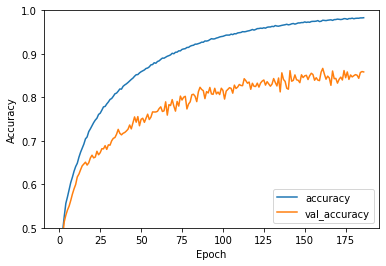

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
from keras.utils.vis_utils import plot_model
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(image_test, categories_test, verbose=2)
print(test_loss)
print(test_acc)
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

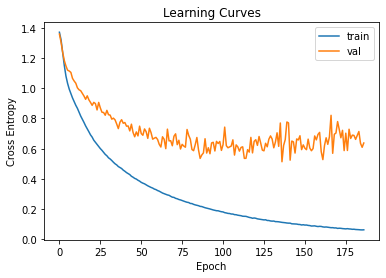

In [71]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [74]:
import keras
import tensorflow as tf
from keras.models import load_model
import os
import cv2
from PIL import Image,ImageOps
import numpy as np
import pandas as pd   
categories_valtest=[]
model = tf.keras.models.load_model('/home/rabikkk/Desktop/final_project/learning/deneme.hdf5')
images = []
# Test edeceğin datanı preprocess et trainingde verdiğin input haline getir.
main_folder ='/home/rabikkk/Desktop/final_project/last_dataset/testing/index2/'
for f_name in sorted(os.listdir(main_folder)):
    #image = Image.open(main_folder + f_name)
    image = Image.open(main_folder + f_name)
    image=ImageOps.grayscale(image)
    #image_array = asarray(image)
    image_array=np.array(image)
    images.append(image_array)
    category=f_name.split('_')[0]
    if category=='close':
      categories_valtest.append(0)
    elif category=='index': 
      categories_valtest.append(1)
    elif category=='last': 
      categories_valtest.append(2)
    else:
      categories_valtest.append(3)

df=pd.DataFrame({
    'filename':images,
    'category':categories_valtest
})
categories_valtest=np.asarray(categories_valtest)
categories_valtest=categories_valtest.reshape(len(images),1)
images=np.asarray(images)
images = images.reshape((images.shape[0],32, 32,1))
images = images.astype("float32") / 255.0
print(images.shape)
yhat = model.predict([images])
#print('Predicted: %.3f' % yhat[0])
predictions = model.predict_classes(images)

print(predictions)
# summarize the first 5 cases
count=0;
for i in range(len(images)):
    if predictions[i]==categories_valtest[i]:
        count+=1
    #print('%s%d=> %d (expected %d)' % (f_name,i,predictions[i], categories_valtest[i])) 
print('Result:%f' % ((count/len(categories_valtest))*100))   
   

(201, 32, 32, 1)
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 2
 2 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1]
Result:87.064677


In [194]:
import keras
import tensorflow as tf
from keras.models import load_model
import os
import cv2

model = tf.keras.models.load_model('/home/rabikkk/Desktop/final_project/learning/deneme.hdf5')
images = []
# Test edeceğin datanı preprocess et trainingde verdiğin input haline getir.
main_folder ='/home/rabikkk/Desktop/final_project/last_dataset/testset/index2/'
for f_name in sorted(os.listdir(main_folder)):
    #image = Image.open(main_folder + f_name)
    image = Image.open(main_folder + f_name)
    image=ImageOps.grayscale(image)
    #image_array = asarray(image)
    image_array=np.array(image)
    images.append(image_array)
images = np.asarray(images)
images = images.reshape((images.shape[0], 32, 32,1))
images = images.astype("float32") / 255.0
print(images.shape)
yhat = model.predict([images])
#print('Predicted: %.3f' % yhat[0])
predictions = model.predict_classes(images)

print(predicted)
# summarize the first 5 cases
for i in range(len(y[i])):
    print('%s => %d (expected %d)' % (images[i].tolist(), predictions[i], y[i]))    

#error = categorical_crossentropy(ACTUAL CLASS, PREDICTED CLASS)

(298, 32, 32, 1)
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1
 1 1]


# New Test_set and Train_set

In [90]:
import cv2
import os
import pandas as pd   
from PIL import Image
from numpy import asarray  
import numpy as np

src='/home/rabikkk/Desktop/final_project/data2/test_Set_image/open1/'
filenames_test=os.listdir(src)

categoriesnew_test=[]
imagenew_test=[]
print(len(filenames_test))
for f_name in filenames_test:
    image=Image.open(src+f_name)
    numpydata = asarray(image)
    imagenew_test.append(numpydata)
    #print(len(image_test))
    category=f_name.split('_')[0]
    if category=='close':
      categoriesnew_test.append(0)
    elif category=='index': 
      categoriesnew_test.append(1)
    elif category=='last': 
      categoriesnew_test.append(2)
    else:
      categoriesnew_test.append(3)

df=pd.DataFrame({
    'filename':filenames_test,
    'category':categoriesnew_test
})

imagenew_test=np.asarray(imagenew_test)
imagenew_test=imagenew_test/255.0
#image_test=image_test.reshape(2008,32,32)
categoriesnew_test=np.asarray(categoriesnew_test)
categoriesnew_test=categories_test.reshape(len(filenames_test),1)

print(imagenew_test.shape)
print(categoriesnew_test.shape)

58


ValueError: cannot reshape array of size 2050 into shape (58,1)

In [ ]:
import cv2
import os
import pandas as pd   
from PIL import Image
from numpy import asarray  
import numpy as np
  
src='/content/drive/MyDrive/final_project/trainnew/'
filenames_train=os.listdir(src)

categoriesnew_train=[]
imagenew_train=[]
print(len(filenames_train))
for f_name in filenames_train:
    image=Image.open(src+f_name)
    numpydata = asarray(image)
    imagenew_train.append(numpydata)
    #print(len(image_train))
    category=f_name.split('_')[0]
    if category=='close':
      categoriesnew_train.append(0)
    elif category=='index': 
      categoriesnew_train.append(1)
    elif category=='last': 
      categoriesnew_train.append(2)
    else:
      categoriesnew_train.append(3)

df=pd.DataFrame({
    'filename':filenames_train,
    'category':categories_train
})

imagenew_train=np.asarray(imagenew_train)
imagenew_train=image_train/255.0
categoriesnew_train=np.asarray(categoriesnew_train)
categoriesnew_train=categories_train.reshape(len(filenames_train),1)

print(imagenew_train.shape)
print(categoriesnew_train.shape)


print(categoriesnew_train)

# New_Learning

In [ ]:
from keras.models import load_model
model = load_model(filepath)
filepath='/content/drive/My Drive/final_project/learn/' + model_name + '.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
logpath = '/content/drive/My Drive/final_project/learn/' + model_name + '.log'
csv_logger = keras.callbacks.CSVLogger(logpath)
callbacks_list = [checkpoint,csv_logger]
history = model.fit(imagenew_train, categoriesnew_train, epochs=50,validation_data=(imagenew_test, categoriesnew_test), callbacks=[callbacks_list])#callbacks=[callbacks_list,early_stop]

#Testing

In [ ]:
import keras
import tensorflow as tf
from keras.models import load_model
import os
import cv2

model = tf.keras.models.load_model('/content/drive/My Drive/co/sil/deneme.hdf5')
images = []
# Test edeceğin datanı preprocess et trainingde verdiğin input haline getir.
main_folder = '/content/drive/My Drive/co/htpa_image1/'
for f_name in sorted(os.listdir(main_folder)):

    #image = Image.open(main_folder + f_name)
    image = cv2.imread(main_folder + f_name)
    print(main_folder + f_name)
    #image_array = asarray(image)
    image_array=np.array(image)
    images.append(image_array)
images = np.array(images)
print(images.shape)
predicted = model.predict_classes(images)
print(predicted)
    

#error = categorical_crossentropy(ACTUAL CLASS, PREDICTED CLASS)

#Add Noise
***`Gürültü ekleme Çıkarma ile detaylı kodlar aşağıda belirtildiği gibidir.`***

---



In [ ]:
##Add noise for test set
import cv2
import os
import pandas as pd   
from PIL import Image
from numpy import asarray  
import numpy as np
import matplotlib.pyplot as plt
src='/content/drive/MyDrive/final_project/test/'
def noise_add(img):
  mean = 0
  var = 10
  sigma = var ** 0.5
  gaussian = np.random.normal(mean+5, sigma, (32, 32)) #  np.zeros((224, 224), np.float32)

  noisy_image = np.zeros(img.shape, np.float32)

  if len(img.shape) == 2:
      noisy_image = img + gaussian
  else:
    noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    noisy_image[:, :, 2] = img[:, :, 2] + gaussian

  cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
  noisy_image = noisy_image.astype(np.uint8)
  return noisy_image

filenames_test=os.listdir(src)
#print(len(filenames_test))
for f_name in filenames_test:
    image=cv2.imread(src+f_name)
    cv2.imwrite(('/content/drive/MyDrive/final_project/test1/'+f_name),noise_add(image))

print("true")

In [ ]:
##Add noise for train set
import cv2
import os
import pandas as pd   
from PIL import Image
from numpy import asarray  
import numpy as np
import matplotlib.pyplot as plt
src='/content/drive/MyDrive/final_project/train/'
def noise_add(img):
  mean = 0
  var = 10
  sigma = var ** 0.5
  gaussian = np.random.normal(mean+5, sigma, (32, 32)) #  np.zeros((224, 224), np.float32)

  noisy_image = np.zeros(img.shape, np.float32)

  if len(img.shape) == 2:
      noisy_image = img + gaussian
  else:
    noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    noisy_image[:, :, 2] = img[:, :, 2] + gaussian

  cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
  noisy_image = noisy_image.astype(np.uint8)
  return noisy_image

filenames_test=os.listdir(src)
#print(len(filenames_test))
for f_name in filenames_test:
    image=cv2.imread(src+f_name)
    cv2.imwrite(('/content/drive/MyDrive/final_project/train1/'+f_name),noise_add(image))

print("true")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
# Plotting the original image.
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the Multi Otsu result.
ax[1].imshow(noisy_image)
ax[1].set_title('noisy')
ax[1].axis('off')


In [154]:
#Denoising for htpa image

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd   
from PIL import Image
from numpy import asarray  
import numpy as np
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, color
from skimage.util import random_noise
#htpa_sensor data denoising
src='/home/rabikkk/Desktop/final_project/data2/test/last_test78.jpg'
new_test='/content/drive/MyDrive/co/htpa_image1/'
#original = cv2.imread('/content/drive/MyDrive/co/htpa_image/gray5.png')

sigma = 0.3
#filenames_test=os.listdir(src)
# defining the kernel i.e. Structuring element
kernel = np.ones((5,5),np.float32)/25
#print(len(filenames_test))
image=cv2.imread(src)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#closing= cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
# Otsu's thresholding after Gaussian filtering
#blur = cv2.GaussianBlur(closing,(5,5),0)
#ret3,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
noisy = random_noise(image, var=sigma**12)
#dilation = cv2.dilate(image,kernel,iterations = 1)
#image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
img=denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,multichannel=True)
im = np.uint8(255 *img)
im = cv2.bilateralFilter(im,9,75,75)
'''
for f_name in filenames_test:
    image=cv2.imread(src+f_name)
 #   im1=cv2.imread("/content/drive/MyDrive/co/htpa_image/gray5.png")
    noisy = random_noise(image, var=sigma**12)

# Estimate the average noise standard deviation across color channels.
    sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
    img=denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,multichannel=True)
    im = np.uint8(255 *img)
    im = cv2.bilateralFilter(im,9,75,75)
    
    #closing = cv2.morphologyEx(noise_im, cv2.MORPH_OPEN, kernel)

    #cv2.imwrite('/content/drive/MyDrive/co/htpa_image1/'+f_name,im)
    print('Successfully saved')
'''

'\nfor f_name in filenames_test:\n    image=cv2.imread(src+f_name)\n #   im1=cv2.imread("/content/drive/MyDrive/co/htpa_image/gray5.png")\n    noisy = random_noise(image, var=sigma**12)\n\n# Estimate the average noise standard deviation across color channels.\n    sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)\n    img=denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,multichannel=True)\n    im = np.uint8(255 *img)\n    im = cv2.bilateralFilter(im,9,75,75)\n    \n    #closing = cv2.morphologyEx(noise_im, cv2.MORPH_OPEN, kernel)\n\n    #cv2.imwrite(\'/content/drive/MyDrive/co/htpa_image1/\'+f_name,im)\n    print(\'Successfully saved\')\n'

(-0.5, 31.5, 31.5, -0.5)

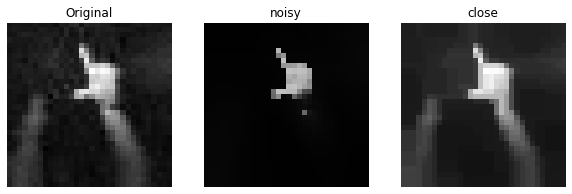

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
# Plotting the original image.
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the Multi Otsu result.
ax[1].imshow(im)
ax[1].set_title('noisy')
ax[1].axis('off')
# Plotting the Multi Otsu result.
ax[2].imshow(closing)
ax[2].set_title('close')
ax[2].axis('off')

In [ ]:

# Python program to demonstrate erosion and 
# dilation of images.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
# Reading the input image
img = cv2.imread('/content/drive/MyDrive/co/htpa_image1/gray5.png', 0)
  
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
  
# The first parameter is the original image,
# kernel is the matrix with which image is 
# convolved and third parameter is the number 
# of iterations, which will determine how much 
# you want to erode/dilate a given image. 

img_dilation = cv2.dilate(img, kernel, iterations=1)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
  
cv2_imshow (img)
cv2_imshow( img_erosion)
cv2_imshow( img_dilation)